# SISTEMA DE INFERENCIA BORROSA TAKAGI – SUGENO

## Importar librerias

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import warnings
from scipy.stats import linregress

warnings.filterwarnings("ignore")

## 1. Visualizar los conjuntos borrosos

Unicamente para visualizacion y ajuste para probar y crear buenos antecedentes

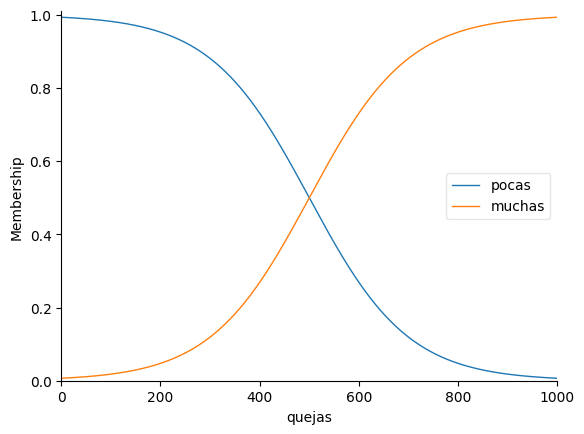

In [15]:
# Cantidad de quejas
#   Universos de discurso de fuzzificacion
quejas = ctrl.Antecedent(np.arange(0, 1001, 1), 'quejas')
quejas['pocas'] = fuzz.sigmf(quejas.universe, 500, -0.01)
quejas['muchas'] = fuzz.sigmf(quejas.universe, 500, 0.01)
quejas.view()

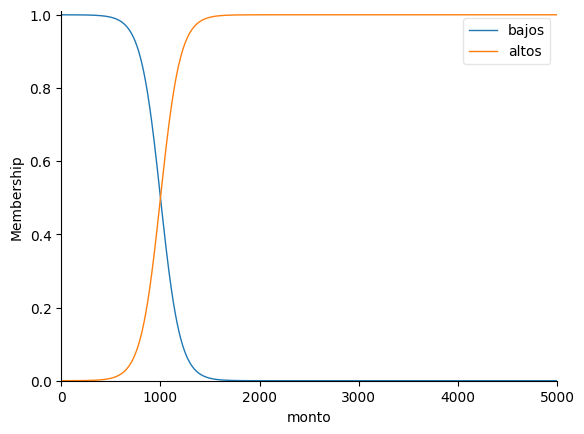

In [16]:
# Monto de compras
## Universos de dircurso y fuzzificacion
monto = ctrl.Antecedent(np.arange(0, 5001, 1), 'monto')
monto['bajos'] = fuzz.sigmf(monto.universe, 1000, -0.01)
monto['altos'] = fuzz.sigmf(monto.universe, 1000, 0.01)
monto.view()

## 2. Declarar los antecedentes

In [17]:
quejas = np.arange(0, 1001, 1)
quejas_pocas = fuzz.sigmf(quejas, 500, -0.01)
quejas_muchas = fuzz.sigmf(quejas, 500, 0.01)

monto = np.arange(0, 5001, 1)
monto_bajos = fuzz.sigmf(monto, 1000, -0.01)
monto_altos = fuzz.sigmf(monto, 1000, 0.01)

## 3. Obtener las funciones afines del consecuente

### Consecuentes con funciones lineales

In [18]:
points = [
  ([0, 500], [0, 20]),
  ([500, 1000], [20, 250]),
  ([150, 1000], [300, 90]),
  ([1000, 5000], [90, 0])
]

m_num = []
b_num = []

for x, y in points:
  slope, intercept, _, _, _ = linregress(x, y)
  m_num.append(slope)
  b_num.append(intercept)


In [19]:
def p (q, n1, m, n2):
  return m_num[n1]*q + b_num[n1] + m_num[n2]*m + b_num[n2]

## 4. Crear la base de conocimiento

In [20]:
def regla (q, tipo_queja, m, tipo_monto):
  mu = min(fuzz.interp_membership(quejas, tipo_queja, q), fuzz.interp_membership(monto, tipo_monto, m))
  return mu

## 5. Construir el defuzzificador

In [21]:
def deffuzificador(q, m):
  # Lista de reglas
  reglas_indices = [[1, 3], [1, 4], [2, 3], [2, 4]]

  # Calcular los valores de p para cada regla
  r = [p(q, i[0] - 1, m, i[1] - 1) for i in reglas_indices]

  # Calcular los grados de pertenencia
  mu = [
    regla(q, quejas_pocas, m, monto_bajos),
    regla(q, quejas_pocas, m, monto_altos),
    regla(q, quejas_muchas, m, monto_bajos),
    regla(q, quejas_muchas, m, monto_altos)
  ]

  # Calcular el numerador y el denominador para la defuzzificación
  numerador = sum(mu[i] * r[i] for i in range(len(mu)))
  denominador = sum(mu)

  # Retornar el valor defuzzificado
  return numerador / denominador if denominador != 0 else 0

In [22]:
deffuzificador(200, 300)

np.float64(264.5759037601858)